In [404]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE 

In [355]:
os.getcwd()

'D:\\programming\\practice\\Project\\Weather dataset'

In [349]:
os.chdir(os.getcwd()+'\\Weather dataset')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'D:\\programming\\practice\\Project\\Weather dataset\\Weather dataset'

In [373]:
df1 = pd.read_csv('./final_merged.csv')
df1 = df1.drop(['Unnamed: 0'] , axis=1)
df1

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,date,airport
0,2017,3,9,25,2017-09-25,12478,JFK,13204,MCO,1346,...,1017.0,14.0,10.0,116.0,76.0,76.0,117.0,74.0,2017-09-25,JFK
1,2017,3,9,25,2017-09-25,12478,JFK,13930,ORD,902,...,1018.0,8.0,10.0,116.0,70.0,70.0,145.0,90.0,2017-09-25,JFK
2,2017,3,9,25,2017-09-25,13930,ORD,12478,JFK,2044,...,1013.0,12.0,10.0,113.0,85.0,85.0,151.0,48.0,2017-09-25,ORD
3,2017,3,9,25,2017-09-25,11057,CLT,12478,JFK,1952,...,1013.0,18.0,10.0,116.0,80.0,80.0,41.0,59.0,2017-09-25,CLT
4,2017,3,9,25,2017-09-25,12478,JFK,11057,CLT,1658,...,1017.0,17.0,10.0,143.0,72.0,72.0,134.0,82.0,2017-09-25,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,1,3,2016-01-03,13204,MCO,13930,ORD,1130,...,1017.0,20.0,6.0,302.0,61.0,60.0,331.0,87.0,2016-01-03,MCO
1877292,2016,1,1,3,2016-01-03,14107,PHX,11292,DEN,2110,...,1013.0,27.0,10.0,122.0,62.0,62.0,76.0,42.0,2016-01-03,PHX
1877293,2016,1,1,3,2016-01-03,11292,DEN,14107,PHX,1830,...,1029.0,8.0,0.0,260.0,26.0,24.0,158.0,100.0,2016-01-03,DEN
1877294,2016,1,1,3,2016-01-03,13930,ORD,13204,MCO,925,...,1022.0,28.0,10.0,122.0,24.0,12.0,333.0,89.0,2016-01-03,ORD


In [374]:
 df1.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'time', 'windspeedKmph', 'DewPointF',
       'cloudcover', 'precipMM', 'pressure', 'WindGustKmph', 'visibility',
       'weatherCode', 'tempF', 'WindChillF', 'winddirDegree', 'humidity',
       'date', 'airport'],
      dtype='object')

In [375]:
df1=df1.dropna()

In [376]:
df1.isnull().sum()

Year               0
Quarter            0
Month              0
DayofMonth         0
FlightDate         0
OriginAirportID    0
Origin             0
DestAirportID      0
Dest               0
CRSDepTime         0
DepTime            0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
ArrTime            0
ArrDelayMinutes    0
ArrDel15           0
time               0
windspeedKmph      0
DewPointF          0
cloudcover         0
precipMM           0
pressure           0
WindGustKmph       0
visibility         0
weatherCode        0
tempF              0
WindChillF         0
winddirDegree      0
humidity           0
date               0
airport            0
dtype: int64

In [377]:
df1 = df1.drop(['FlightDate','Origin','Dest','time','date','airport','DepTime','DepDel15','ArrTime','ArrDel15','ArrDelayMinutes'],axis=1)

In [378]:
df1.dtypes

Year                 int64
Quarter              int64
Month                int64
DayofMonth           int64
OriginAirportID      int64
DestAirportID        int64
CRSDepTime           int64
DepDelayMinutes    float64
CRSArrTime           int64
windspeedKmph      float64
DewPointF          float64
cloudcover         float64
precipMM           float64
pressure           float64
WindGustKmph       float64
visibility         float64
weatherCode        float64
tempF              float64
WindChillF         float64
winddirDegree      float64
humidity           float64
dtype: object

In [379]:
df1

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepDelayMinutes,CRSArrTime,windspeedKmph,...,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity
0,2017,3,9,25,12478,13204,1346,0.0,1642,12.0,...,39.0,0.0,1017.0,14.0,10.0,116.0,76.0,76.0,117.0,74.0
1,2017,3,9,25,12478,13930,902,0.0,1045,6.0,...,55.0,0.0,1018.0,8.0,10.0,116.0,70.0,70.0,145.0,90.0
2,2017,3,9,25,13930,12478,2044,1.0,2359,10.0,...,5.0,0.0,1013.0,12.0,10.0,113.0,85.0,85.0,151.0,48.0
3,2017,3,9,25,11057,12478,1952,0.0,2157,11.0,...,32.0,0.0,1013.0,18.0,10.0,116.0,80.0,80.0,41.0,59.0
4,2017,3,9,25,12478,11057,1658,0.0,1914,14.0,...,47.0,0.0,1017.0,17.0,10.0,143.0,72.0,72.0,134.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,1,3,13204,13930,1130,0.0,1330,16.0,...,100.0,1.9,1017.0,20.0,6.0,302.0,61.0,60.0,331.0,87.0
1877292,2016,1,1,3,14107,11292,2110,42.0,2259,17.0,...,99.0,0.0,1013.0,27.0,10.0,122.0,62.0,62.0,76.0,42.0
1877293,2016,1,1,3,11292,14107,1830,58.0,2024,4.0,...,100.0,0.0,1029.0,8.0,0.0,260.0,26.0,24.0,158.0,100.0
1877294,2016,1,1,3,13930,13204,925,74.0,1312,19.0,...,100.0,0.0,1022.0,28.0,10.0,122.0,24.0,12.0,333.0,89.0


In [380]:
cor= df1.corr() 
cor

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepDelayMinutes,CRSArrTime,windspeedKmph,...,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity
Year,1.000000,-0.001482,-0.002123,0.000229,0.000413,0.000245,0.001934,0.003810,0.000027,0.027998,...,-0.089723,0.009171,-0.043726,0.040949,0.057806,-0.022994,-0.011376,0.003672,0.000174,-0.043741
Quarter,-0.001482,1.000000,0.970570,0.010586,0.002955,0.003532,-0.003222,-0.016112,-0.003149,-0.098277,...,-0.086720,-0.038070,0.037999,-0.093351,0.119100,-0.087895,0.153333,0.149413,-0.046475,-0.054573
Month,-0.002123,0.970570,1.000000,0.010398,0.002982,0.003583,-0.002821,-0.017830,-0.003825,-0.094867,...,-0.084063,-0.040719,0.043222,-0.090576,0.120283,-0.088409,0.142851,0.138489,-0.047825,-0.053722
DayofMonth,0.000229,0.010586,0.010398,1.000000,0.000303,0.000310,-0.000143,-0.006793,-0.001545,0.009261,...,-0.015432,-0.002196,-0.033402,0.006058,0.024988,-0.009631,0.016581,0.016114,0.001036,-0.001323
OriginAirportID,0.000413,0.002955,0.002982,0.000303,1.000000,-0.026355,-0.052992,0.007296,-0.021444,-0.040186,...,0.073512,-0.029471,-0.057966,-0.045199,-0.019767,-0.026933,-0.050995,-0.047370,0.011149,0.098838
DestAirportID,0.000245,0.003532,0.003583,0.000310,-0.026355,1.000000,0.067229,0.016813,0.008753,0.006616,...,-0.014363,-0.010468,-0.029394,0.002146,0.014307,-0.018354,-0.029965,-0.028656,0.029591,-0.025567
CRSDepTime,0.001934,-0.003222,-0.002821,-0.000143,-0.052992,0.067229,1.000000,0.106931,0.535206,0.174511,...,-0.059108,0.036494,-0.077309,0.124090,0.113659,0.015472,0.164287,0.162883,0.054194,-0.208309
DepDelayMinutes,0.003810,-0.016112,-0.017830,-0.006793,0.007296,0.016813,0.106931,1.000000,0.088716,0.072681,...,0.031638,0.082346,-0.052279,0.071523,-0.019062,0.079764,0.030197,0.027859,0.012616,0.003691
CRSArrTime,0.000027,-0.003149,-0.003825,-0.001545,-0.021444,0.008753,0.535206,0.088716,1.000000,0.159443,...,-0.035452,0.029463,-0.062992,0.089311,0.095796,0.011922,0.143195,0.133718,0.020320,-0.211462
windspeedKmph,0.027998,-0.098277,-0.094867,0.009261,-0.040186,0.006616,0.174511,0.072681,0.159443,1.000000,...,0.090055,0.129822,-0.203971,0.911154,0.035715,0.117083,-0.097024,-0.127465,0.120536,0.014481


<AxesSubplot: >

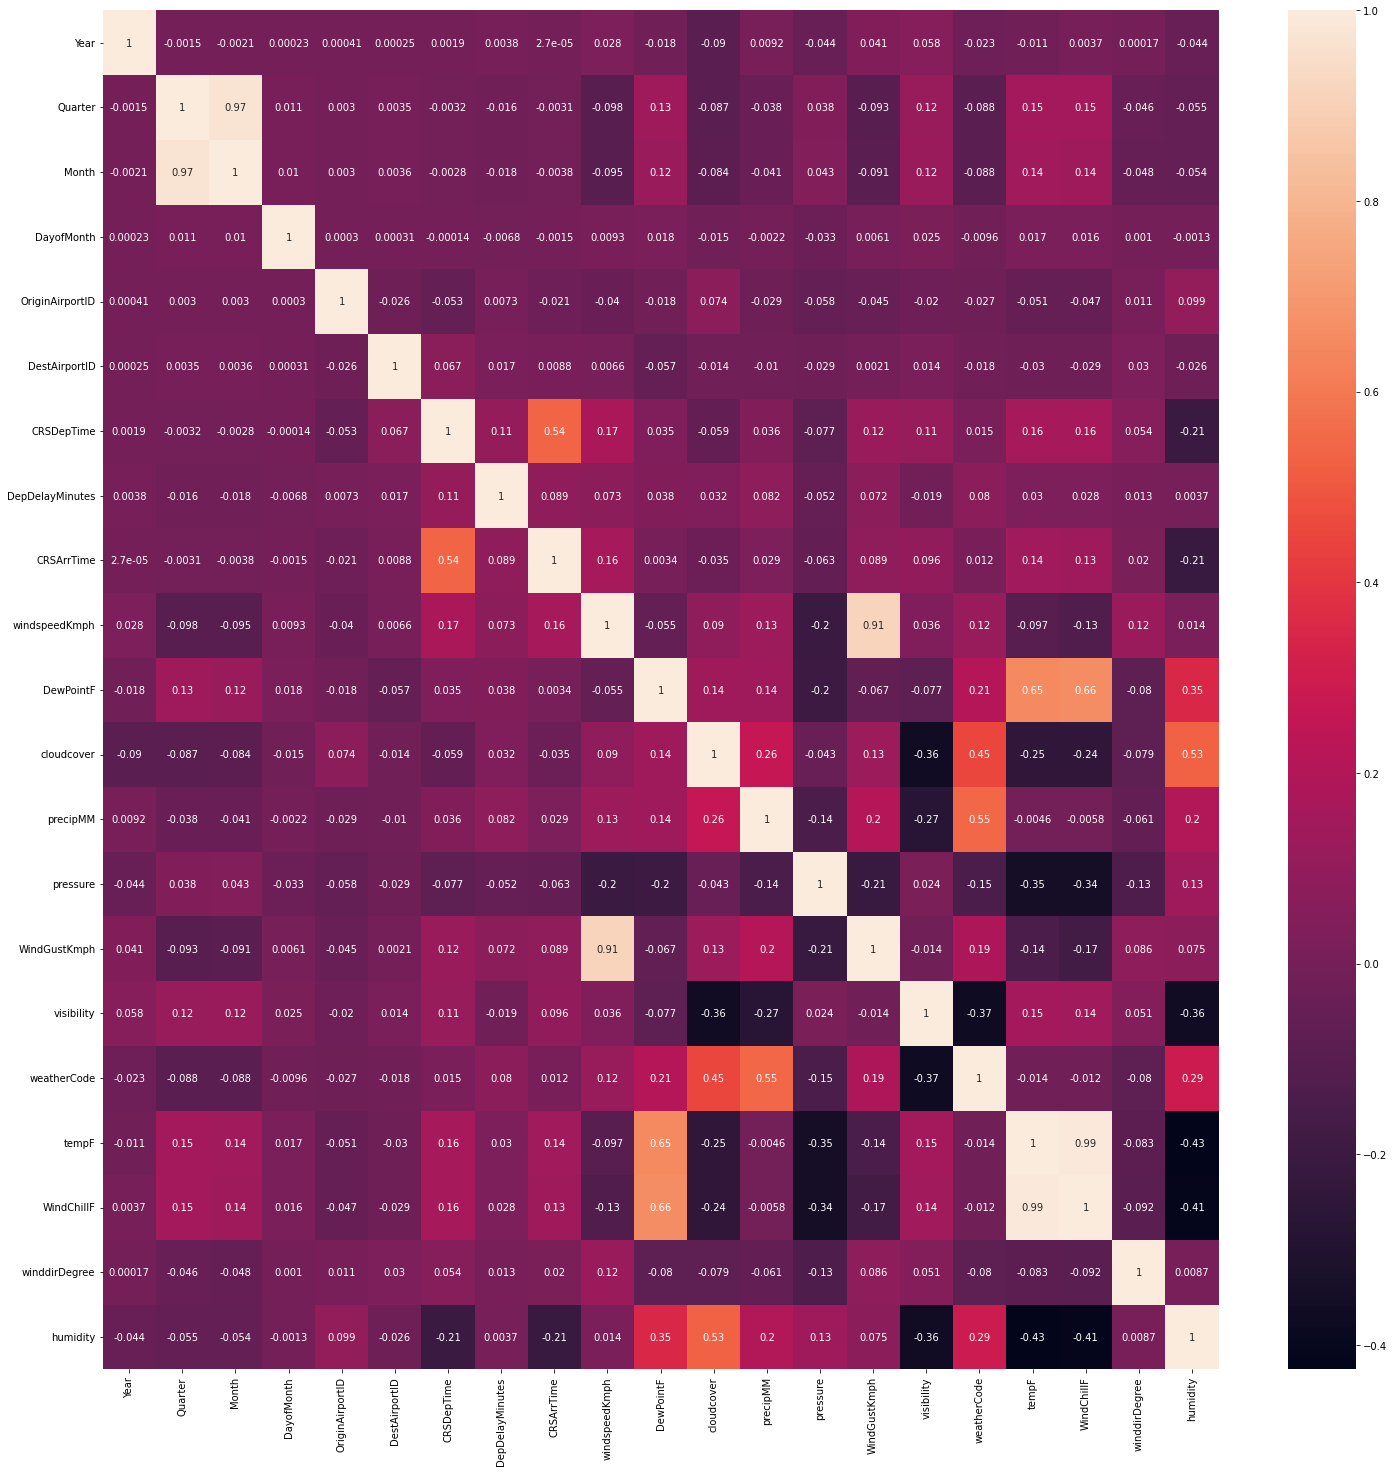

In [381]:
plt.figure(figsize=(25,25))
sns.heatmap(cor,annot=True)

In [382]:
#month and quarter are positivly correlated
#windspeedkmph and windGustKmph are positivly correlated
#WindChillF and tempF are positivly correlated
df1 = df1.drop(['Quarter','WindGustKmph','WindChillF'],axis=1)

In [383]:
df1

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepDelayMinutes,CRSArrTime,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,visibility,weatherCode,tempF,winddirDegree,humidity
0,2017,9,25,12478,13204,1346,0.0,1642,12.0,67.0,39.0,0.0,1017.0,10.0,116.0,76.0,117.0,74.0
1,2017,9,25,12478,13930,902,0.0,1045,6.0,66.0,55.0,0.0,1018.0,10.0,116.0,70.0,145.0,90.0
2,2017,9,25,13930,12478,2044,1.0,2359,10.0,63.0,5.0,0.0,1013.0,10.0,113.0,85.0,151.0,48.0
3,2017,9,25,11057,12478,1952,0.0,2157,11.0,64.0,32.0,0.0,1013.0,10.0,116.0,80.0,41.0,59.0
4,2017,9,25,12478,11057,1658,0.0,1914,14.0,66.0,47.0,0.0,1017.0,10.0,143.0,72.0,134.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,3,13204,13930,1130,0.0,1330,16.0,56.0,100.0,1.9,1017.0,6.0,302.0,61.0,331.0,87.0
1877292,2016,1,3,14107,11292,2110,42.0,2259,17.0,38.0,99.0,0.0,1013.0,10.0,122.0,62.0,76.0,42.0
1877293,2016,1,3,11292,14107,1830,58.0,2024,4.0,26.0,100.0,0.0,1029.0,0.0,260.0,26.0,158.0,100.0
1877294,2016,1,3,13930,13204,925,74.0,1312,19.0,21.0,100.0,0.0,1022.0,10.0,122.0,24.0,333.0,89.0


In [384]:
X = df1.drop('DepDelayMinutes',axis=1)
y = df1['DepDelayMinutes']

In [385]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [408]:
oversample = SMOTE(random_state=10,)
X_train , y_train = oversample.fit_resample(X_train,y_train)

MemoryError: Unable to allocate 116. MiB for an array with shape (893627, 17) and data type float64

In [386]:
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

In [387]:
res=model_LR.predict(X_test)

In [388]:
model_LR.score(X_test,y_test)

0.024753663403963455

In [389]:
model_ETR = ExtraTreeRegressor()
model_ETR.fit(X_train,y_train)

ExtraTreeRegressor()

In [390]:
model_ETR.predict(X_test)

array([0., 0., 3., ..., 4., 0., 0.])

In [391]:
model_LR.score(X_test,y_test)

0.024753663403963455